# Assignment

## Instructions

In this assignment, you will apply the computer vision concepts covered in the lesson to perform image classification using the Fashion MNIST dataset. The Fashion MNIST dataset consists of 60,000 28x28 grayscale images of 10 fashion categories.

### Task: Build an Image Classifier

1. Use the provided starter code to load and explore the Fashion MNIST dataset
2. Preprocess the images using appropriate techniques (e.g., normalization, data augmentation)
3. Build a CNN model to classify the images into one of the 10 classes
4. Train your model and evaluate its performance
5. Experiment with at least one technique to improve model performance (e.g., batch normalization, different pooling strategies, additional convolutional layers)
6. Visualize and analyze your results

### Starter Code


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import warnings
warnings.filterwarnings('ignore')

# Define transformations
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the Fashion MNIST dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Classes in Fashion MNIST
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

/home/localuser/miniconda3/envs/dl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# TODO: Build your CNN model

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # TODO: Define your model architecture here

        # Convolutional layer with batch normalization
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(num_features=32)

        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Second convolutional layer with batch normalization
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(num_features=64)

        # Fully connected layers
        self.fc1 = nn.Linear(in_features=64 * 7 * 7, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        # TODO: Define the forward pass here

        # Apply convolutional layers, activation function, and pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))

        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

In [ ]:
# TODO: Train and evaluate your model

model = SimpleCNN()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to train the CNN
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')
    
    print('Finished Training')

# Train the model
train_model(model, train_loader, criterion, optimizer)


Epoch 1, Loss: 0.4157438817024231
Epoch 2, Loss: 0.2978875645319621
Epoch 3, Loss: 0.26334580800433954
Epoch 4, Loss: 0.23670798595547676
Epoch 5, Loss: 0.21903095578228435
Epoch 6, Loss: 0.20713486599425474
Epoch 7, Loss: 0.19472331304897864
Epoch 8, Loss: 0.18248192401230334
Epoch 9, Loss: 0.17411578298186262
Epoch 10, Loss: 0.16545947425713142
Finished Training


In [4]:
# Evaluating the CNN
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy of the network on the test images: {100 * correct // total} %')

evaluate_model(model, test_loader)

Accuracy of the network on the test images: 91 %


Predicted:  Ankle boot Pullover Trouser Trouser


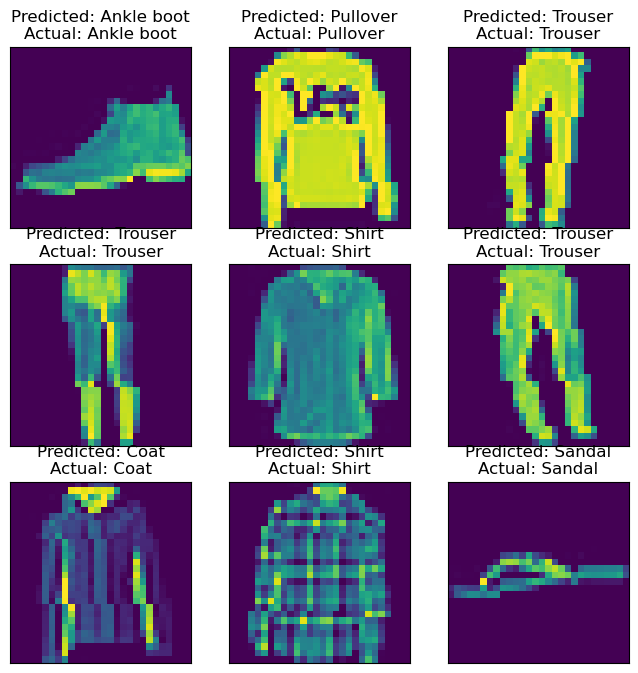

In [5]:
# TODO: Visualize results

def imshow(img, ax):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))

# Get some random test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Predict images
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display images and labels
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

fig = plt.figure(figsize=(8, 8))
for idx in np.arange(9):
    ax = fig.add_subplot(3, 3, idx+1, xticks=[], yticks=[])
    imshow(images[idx], ax)
    ax.set_title(f"Predicted: {classes[predicted[idx]]}\nActual: {classes[labels[idx]]}")

plt.show()